<b>Zadanie 1</b> <br>
Zamień sygnał na sumę sygnałów np. <br>
x = sin.(2 * pi * t * 200) + 2 * sin.(2 * pi * t * 400) <br>
Zaobserwuj wynik transformaty i wyjaśnij go.

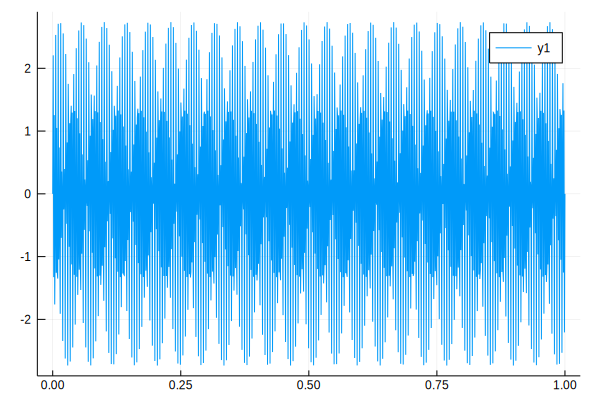

In [34]:
using Plots

#Wybieram częstotliwość próbkowania
Fs = 1024;  

# generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1; 

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz) 
x= sin.(2*pi*t*200) + 2 * sin.(2*pi*t*400)
plot(t,x)

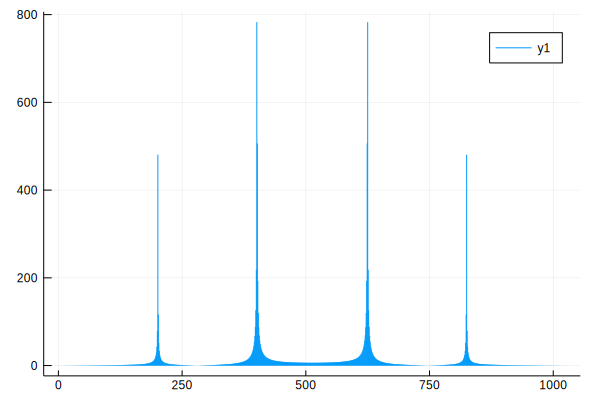

In [35]:
using FFTW
#Dokonuję transformaty Fouriera
y=fft(x)
sticks((abs.(fft(x))))

<b> Zadanie 2 </b>
2.  Usuwanie szumów:

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Prosze narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci  rzeczywistej. Porównać z wejściowym wykresem sygnału.

In [21]:
# produkcja sztucznego sygnału.
#Wybieram częstotliwość próbkowania
Fs = 1024;  

# generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1; 

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz) 
x= rand(Float64, 1024) + cos.(2*pi*t*200)

1024-element Array{Float64,1}:
  1.493319299434431  
  0.6036642678692561 
 -0.1583264174071245 
 -0.5829667765816341 
  0.7309615488065209 
  1.0128976146400905 
  0.9305067487384183 
 -0.5118078153310455 
 -0.5859230559144893 
  0.9089158856068332 
  1.8159909140310333 
  1.0805026035286196 
  0.09960451638897361
  ⋮                  
  0.8334552376723997 
  1.6118955851182342 
  0.9998198427243633 
 -0.45415337150603674
 -0.5028858822017708 
  1.3521245171968417 
  1.987136717549323  
  0.48863435804698024
 -0.2954440737283892 
  0.07196800589491048
  0.3966967475147736 
  1.9891563283284635 

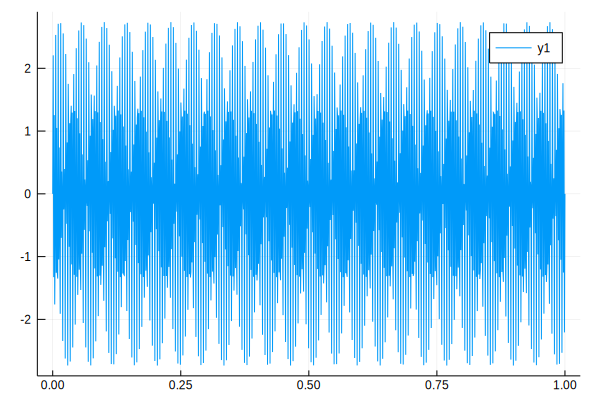

In [36]:
plot(t, x)

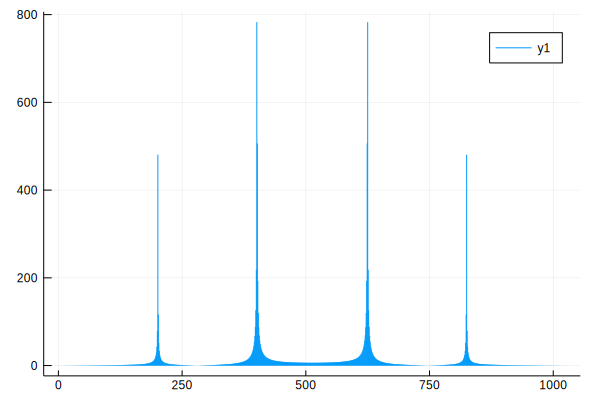

In [37]:
using FFTW
#Dokonuję transformaty Fouriera
y=fft(x)
sticks((abs.(fft(x))))

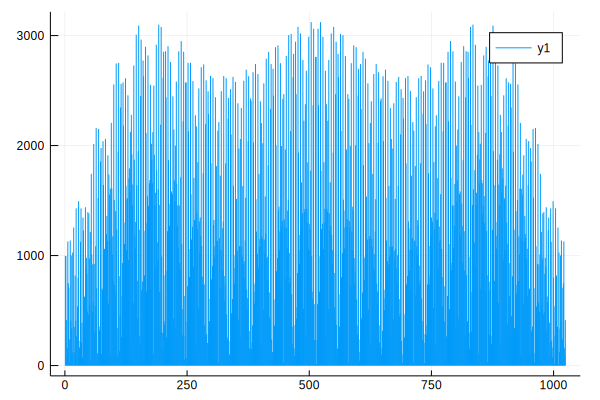

In [38]:
for i in (1:1024)
    if abs.(y[i])<100
        y[i] = 0
    end
end
sticks((abs.(fft(y)))) 

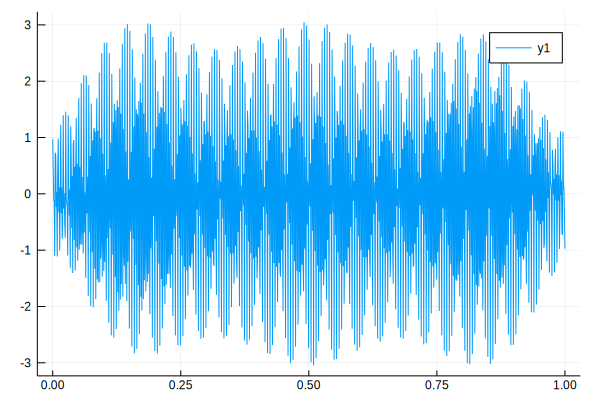

In [39]:
x=ifft(y)
plot(t,real(x))

<b> Zadanie 3 </b> <br>
Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma. Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.
<p>
Przydatne materiały:
     1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
     2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>

In [26]:
#Pkg.add("WAV")
using WAV, FFTW, Plots
snd, sampFreq, nbits, extra = wavread("dzwiek1.wav")

([0.0 0.0; 0.0 0.0; … ; -0.000885037 -0.000885037; -0.000976592 -0.000976592], 48000.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x80, 0xbb, 0x00, 0x00, 0x00, 0xee, 0x02, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x53, 0x46, 0x54, 0x0e, 0x00  …  0x35, 0x38, 0x2e, 0x32, 0x37, 0x2e, 0x31, 0x30, 0x32, 0x00])])

In [30]:
snd


255234×2 Array{Float64,2}:
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  0.0           0.0        
  ⋮                        
 -0.000854518  -0.000854518
 -0.000854518  -0.000854518
 -0.000671407  -0.000671407
 -0.000885037  -0.000885037
 -0.000732444  -0.000732444
 -0.000549333  -0.000549333
 -0.000579852  -0.000579852
 -0.000549333  -0.000549333
 -0.000854518  -0.000854518
 -0.00100711   -0.00100711 
 -0.000885037  -0.000885037
 -0.000976592  -0.000976592

In [27]:
w=size(snd)
t=w[1]
s1 = snd[:,1] 
s2 = snd[:,2]
timeArray = (0:(t-1)) / sampFreq
timeArray = timeArray * 1000 #scale to milliseconds

0.0f0:0.020833334f0:5317.354f0

In [28]:
Plots.plot(x=timeArray, s1)

In [29]:
Plots.plot(x=timeArray, s2)

In [38]:
wavwrite(s1,"mownits1.wav"; Fs=sampFreq, nbits=nbits, compression=WAVE_FORMAT_PCM)
wavwrite(s2,"mownits2.wav"; Fs=sampFreq, nbits=nbits, compression=WAVE_FORMAT_PCM)

In [ ]:
n1 = length(s1)
p1 = fft(s1)
n2 = length(s2)
p2 = fft(s2)

In [ ]:
sticks(abs.(p1))

In [ ]:
p1

In [5]:
function less_cut(y,n,name)
    m=Complex{Float64}[]
    for i in (1:t)
        push!(m,y[i])
        if abs.(y[i])<n
            m[i] = 0.0
        end
    end
k=real(ifft(m))
wavwrite(k,name; Fs=sampFreq, nbits=nbits, compression=WAVE_FORMAT_PCM)
return k
end

function more_cut(y,n,name)
    m=Complex{Float64}[]
    for i in (1:t)
        push!(m,y[i])
        if abs.(y[i])<n
            m[i] = 0.0
        end
    end
k=real(ifft(m))
wavwrite(k,name; Fs=sampFreq, nbits=nbits, compression=WAVE_FORMAT_PCM)
return k
end

function change_freq(y,n,name)
    m=Complex{Float64}[]
    for i in (1:t)
            push!(m,n*y[i])
    end
k=real(ifft(m))
wavwrite(k,name; Fs=sampFreq, nbits=nbits, compression=WAVE_FORMAT_PCM)
return k
end

function join_paths(x,y,name)
    w=[x y]
    wavwrite(w,name; Fs=sampFreq, nbits=nbits, compression=WAVE_FORMAT_PCM)
    return w
end

join_paths (generic function with 1 method)

In [6]:
a=less_cut(p1,25,"dzwieki/mownit_s1_less_25.wav")

b=less_cut(p1,50,"dzwieki/mownit_s1_less_50.wav")
c=less_cut(p1,100,"dzwieki/mownit_s1_less_100.wav")
d=less_cut(p2,25,"dzwieki/mownit_s2_less_25.wav")
e=less_cut(p2,50,"dzwieki/mownit_s2_less_50.wav")
f=less_cut(p2,100,"dzwieki/mownit_s2_less_100.wav")
g=more_cut(p1,100, "dzwieki/mownit_s1_more_100.wav")
h=more_cut(p2,100, "dzwieki/mownit_s2_more_100.wav")
i=more_cut(p1,200, "dzwieki/mownit_s1_more_200.wav")
j=more_cut(p2,200, "dzwieki/mownit_s2_more_200.wav")
k=change_freq(p1,2,"dzwieki/mownit_s1_2x.wav")
l=change_freq(p2,2,"dzwieki/mownit_s2_2x.wav")
m=change_freq(p1,0.5,"dzwieki/mownit_s1_05x.wav")
n=change_freq(p2,0.5,"dzwieki/mownit_s2_05x.wav")
join_paths(c,f,"dzwieki/mownit_s_less_100.wav")
join_paths(i,j,"dzwieki/mownit_s_more_200.wav")
join_paths(k,l,"dzwieki/mownit_s_12x.wav")
join_paths(m,n,"dzwieki/mownit_s_05x.wav")
x=join_paths(a,d,"dzwieki/mownit_s_less_25.wav")
p=less_cut(p1,10,"dzwieki/mownit_s1_less_10.wav")
o=less_cut(p2,10,"dzwieki/mownit_s1_less_10.wav")
join_paths(p,o,"dzwieki/mownit_s_less_10.wav")

UndefVarError: UndefVarError: p1 not defined

In [ ]:
plot(timeArray, a)
plot!(timeArray, s1)